In [2]:
import pyvisa
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import time
from numpy import *
import numpy as np

In [5]:
rm = pyvisa.ResourceManager()
list_of_instrument = rm.list_resources()
for i in range(len(list_of_instrument)):
    my_instrument = rm.open_resource(list_of_instrument[i])
    try:
        listen = my_instrument.query('*IDN?')
        print(i, 'Found instrument at', list_of_instrument[i], '-> ', listen[:-2])
    except: pass

1 Found instrument at GPIB0::5::INSTR ->  LSCI,MODEL370,370A5N,04102008
2 Found instrument at GPIB0::20::INSTR ->  Rohde-Schwarz,ZNB8-2Port,1311601042102249,2.8


# This might help to fine TCPIP connections

In [4]:
import pyvisa as visa
resources = visa.ResourceManager('@py')
resources.list_resources()

ValueError: Wrapper not found: No package named pyvisa_py

# In case you get timeout error, try to read raw data

In [61]:
# sr = sr.decode('ASCII')

sr = sr.split(',')

In [16]:
import pyvisa
rm = pyvisa.ResourceManager()

my_instrument = rm.open_resource('GPIB0::17::INSTR', query_delay=1.0)

# sr = my_instrument.query('FSTR? 0')
my_instrument.write("CALC1:DATA? SDAT")
sr = my_instrument.read_raw()

sr

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [10]:
my_instrument.timeout = 6000

In [15]:
my_instrument.query("CALC1:DATA? SDAT")

'-7.19449028E-005,-0.0001555612254,-0.0006589268027,-0.0008174197105,-0.00325939759,-0.002491062856,-0.003893631708,-0.001772513532,-0.01360405477,-0.00263291827,-0.02794186686,0.005030984435,-0.044151573,0.04061710112,-0.005091728501,0.08151939998,0.03787366019,0.07359024531,0.06096997434,0.06015161695,0.08455884266,0.04829500737,0.1198392591,0.02848340285,0.166535914,-0.04002511921,0.09498941978,-0.1720321386,-0.02796574717,-0.1295850039,-0.04390730377,-0.07096020768,-0.03908683229,-0.04319949143,-0.03107809734,-0.02822265004,-0.02818169509,-0.0192089003,-0.02382192354,-0.01482952245,-0.02013290906,-0.01117804419,-0.01815904113,-0.008681969048,-0.0158286038,-0.00694954072,-0.01466694016,-0.005374948118,-0.01389050443,-0.004501631093,-0.01182448438,-0.003682195511,-0.01074410076,-0.003045571046,-0.009956656854,-0.002100689708,-0.008785554813,-0.001558800819,-0.008269822875,-0.001210463034,-0.007776230722,-0.001363182134,-0.01439044278,9.012893654E-005,-0.006980094757,-9.328353004E-005

In [62]:
sr[0]

'+6.2638670e-001'

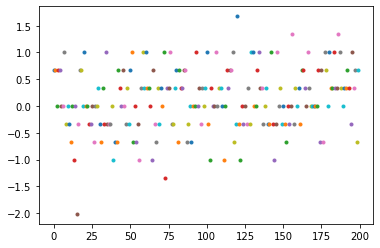

In [29]:
import pyvisa
import matplotlib.pyplot as plt
rm = pyvisa.ResourceManager()

my_instrument = rm.open_resource('GPIB0::30::INSTR')

# my_instrument.query('*IDN?')
for i in range(200):
    my_instrument.write('*CLS')
    my_instrument.write('OUTP?2')
    plt.plot(i, float(my_instrument.read_raw())*1e7, '.')

In [7]:
my_instrument.close()

In [7]:
import scipy.io

mat_data = scipy.io.loadmat(r'C:\Users\nems\Downloads\fixed_calibration.mat')

print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'R', 'T'])


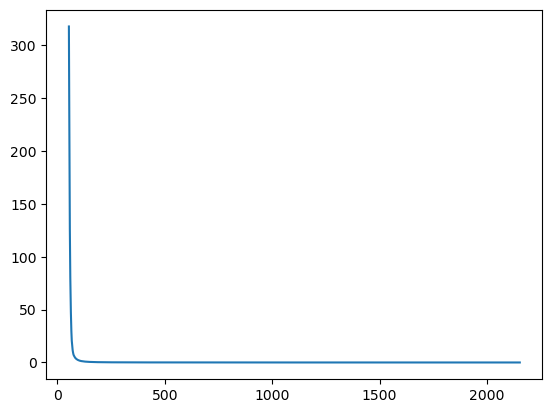

In [42]:
R = mat_data['R'][0]
T = mat_data['T'][0]
plt.plot(R, T)

In [41]:
data = np.column_stack((np.arange(len(R))+1, np.log10(R), T))

np.savetxt(r'C:\Users\nems\Downloads\Demag_calibrated_thermometer.txt', data, delimiter=' ', fmt='%i\t%f\t%f')

print("Data saved successfully to 'output.txt'")

Data saved successfully to 'output.txt'


In [36]:
data

array([[0.00000000e+00, 1.72605039e+00, 3.17889950e+02],
       [1.00000000e+00, 1.72920404e+00, 3.04016693e+02],
       [2.00000000e+00, 1.73235769e+00, 2.85901743e+02],
       [3.00000000e+00, 1.73551134e+00, 2.66234339e+02],
       [4.00000000e+00, 1.73866499e+00, 2.46467989e+02],
       [5.00000000e+00, 1.74181864e+00, 2.27335495e+02],
       [6.00000000e+00, 1.74497229e+00, 2.05021258e+02],
       [7.00000000e+00, 1.74812594e+00, 1.86490273e+02],
       [8.00000000e+00, 1.75127959e+00, 1.68001688e+02],
       [9.00000000e+00, 1.75443324e+00, 1.53448335e+02],
       [1.00000000e+01, 1.75758689e+00, 1.39066582e+02],
       [1.10000000e+01, 1.76074054e+00, 1.26262426e+02],
       [1.20000000e+01, 1.76389419e+00, 1.15396470e+02],
       [1.30000000e+01, 1.76704784e+00, 1.05220876e+02],
       [1.40000000e+01, 1.77020149e+00, 9.56966063e+01],
       [1.50000000e+01, 1.77335514e+00, 8.72728160e+01],
       [1.60000000e+01, 1.77650879e+00, 8.01961800e+01],
       [1.70000000e+01, 1.77966